In [50]:
import numpy as np
import gudhi
import matplotlib
from matplotlib import pyplot as plt

In [51]:
s=[984,1662,1170,1476,1394,1466,1034,1082,1178,928]  

In [152]:
##compute persistence birth-death with GUDHI

for idx in range(1,s[0]):
    file_name = ('../simulation_data/New_data/s03/' + 'force_contact_' + '%06d.dat' % idx)
    data=np.loadtxt(file_name)
    id1 = data[:,0]
    id2 = data[:,1]
    force = data[:,4]+data[:,5]
    st = gudhi.SimplexTree()
    for i in range(1,len(data)):
        st.insert([id1[i],id2[i]],filtration= - force[i]) #st.insert( new_vertex[i-1] ,new_vertex[i], filtration = -new_vertex[i])
    st.initialize_filtration()
    #diagram = st.persistence()
    #pair=st.persistence_pairs()
    #print(diagram)
    diag = st.persistence(0, 0.0, persistence_dim_max = True)
    B0 = st.persistence_intervals_in_dimension(0)
    #print(B1)
    g='../simulation_data/test/S03/'
    f=open(g+ str(idx)+'.txt',"w")
    #print(f)
    f.write(str(B0))
    f.close()

In [73]:
 """
| 03 | 456 - 947 | 983 |
| 05 | 370 - 1200 | 1661 |
| 07 | 816 - 1400 | 1169 |
| 11 | 285 - 1022 | 1475 |
| 13 | 504 - 1200 | 1393 |
| 17 | 230 - 962 | 1465 |
| 19 | 417 - 933 | 1033 |
| 23 | 375 -915 | 1081 |
| 29 | 257 - 845 | 1177 |
| 31 | 368 - 831 | 927 |
"""


In [68]:
import pandas as pd
TP=[]
for i in range(1,s[4]):
    file=open('../simulation_data/PD_files/s13/' + str(i)+'.txt','r')
    q=file.read()
    #print(q)
    qq=q.replace('[[','')
    qq=qq.replace(']','')
    qq=qq.replace('[','')
    file9=qq.replace('inf','0')
    #file9=qq.replace(,'')
    q1=file9.split()
    data1=np.asarray(q1)
    #print(data1)
    birth1=[]
    death1=[]
    for j in range(0,len(data1)//2):
        birth1.append(abs(float(data1[2*j])))
    birthh1=np.array(birth1)
    for k in range(0,len(data1)//2):
        death1.append(abs(float(data1[2*k+1])))
    deathh1=np.array(death1)
    sum_lifespan =np.sum(birthh1-deathh1)
    print(sum_lifespan)
    TP.append(sum_lifespan)
#print(TP)
np.savetxt(('../simulation_data/PD_files/B1/s13/'+ "total_persistence"+".csv"), TP, delimiter=",")
#print(birthh1)

ValueError: could not convert string to float: '(0,'

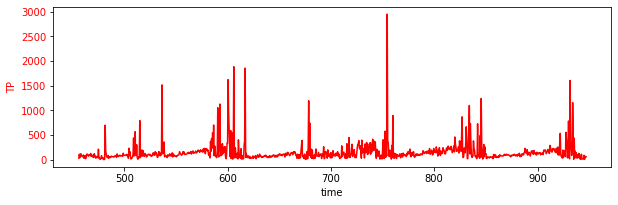

In [160]:
time=np.linspace(456,947,983)
#time2=np.linspace(1000,1200,4000)
#time2=np.linspace(1000,1200,4000)
fig = plt.figure(figsize=(10,10))    
ax1 = fig.add_subplot(3,1,1)
ax1.plot(time,TP,color='red',label='TP')
ax1.set_xlabel('time')
ax1.set_ylabel('TP', color='red')
#ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor='red')

In [64]:
for i in range(1,s[4]):
    file=open('../simulation_data/PD_files/s13/' + str(i)+'.txt','r')
    file2=file.read()
    file3=file2.replace('(0,','')
    file4=file3.replace('))','')
    file5=file4.replace(' (','')
    file6=file5.replace('[','')
    file7=file6.replace(']','')
    file8=file7.replace(' ','')
    file9=file8.replace('inf','0')
    data=file9.split(',')
    data1=np.asarray(data)
    #print(data1)
    birth=[]
    death=[]
    for j in range(0,len(data1)//2):
        birth.append(abs(float(data1[2*j])))
    for k in range(0,len(data1)//2):
        death.append(abs(float(data1[2*k+1])))
    birthh=np.array(birth)
    deathh=np.array(death)
    births = np.reshape(birthh,(len(birth),1))
    deaths = np.reshape(deathh,(len(death),1))
    bd_pair = np.concatenate((births,deaths), axis=1)
    np.savetxt(('../simulation_data/PD_files/B1/s13/'+"PD_%05d"+".csv")%(i+1), bd_pair, delimiter=",")
    
    life_span = births - deaths
    np.savetxt(('../simulation_data/PD_files/B1/s13/'+ "life_span_"+"%05d"+".csv")%(i+1), life_span, delimiter=",")
    #np.savetxt('../simulation_data/PD_files/birth/s31/birth_'+'%06d.csv' %i,birth)
    #np.savetxt('../simulation_data/PD_files/death/s31/death_'+'%06d.csv' %i,death)

     0.000000000000000000e+00
0                0.000000e+00
1                0.000000e+00
2                3.620490e-02
3                0.000000e+00
4                0.000000e+00
..                        ...
127              5.605200e-42
128              5.605200e-42
129              4.203900e-42
130              2.802600e-42
131              2.802600e-42

[132 rows x 1 columns]


<Figure size 432x288 with 0 Axes>

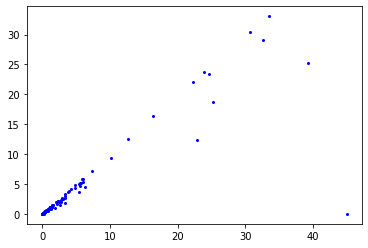

     0.000000000000000000e+00
0                0.000000e+00
1                0.000000e+00
2                0.000000e+00
3                2.050657e-02
4                1.431911e-01
..                        ...
137              9.081590e-21
138              9.563570e-22
139              2.104760e-26
140              1.873604e-26
141              7.882610e-27

[142 rows x 1 columns]


<Figure size 432x288 with 0 Axes>

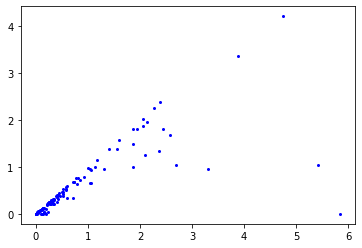

     0.000000000000000000e+00
0                0.000000e+00
1                0.000000e+00
2                0.000000e+00
3                0.000000e+00
4                4.979217e+01
..                        ...
103              1.264690e-02
104              4.047237e-02
105              1.722487e-01
106              8.521780e-02
107              7.384610e-20

[108 rows x 1 columns]


<Figure size 432x288 with 0 Axes>

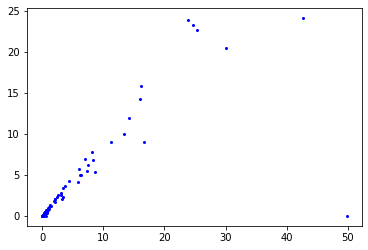

     0.000000000000000000e+00
0                0.000000e+00
1                2.351395e+01
2                0.000000e+00
3                1.879879e-01
4                0.000000e+00
..                        ...
117              5.937010e-10
118              1.927862e-24
119              1.042936e-24
120              2.267690e-25
121              5.090270e-26

[122 rows x 1 columns]


<Figure size 432x288 with 0 Axes>

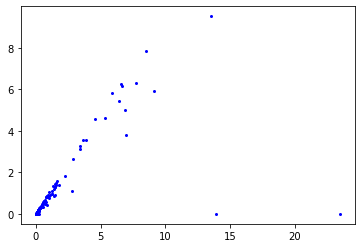

In [86]:
## Compute PD

In [98]:
## Compute PD

for i in range(1,s[8]):
    birth=pd.read_csv('../simulation_data/PD_files/birth/s29/birth_' + '%06d.csv' %i)
    death=pd.read_csv('../simulation_data/PD_files/death/s29/death_' + '%06d.csv' %i)
    plt.figure()
    fig, ax = plt.subplots()
    ax.plot(birth,death,'bo',markersize=2)
    ax.plot(np.arange(0.0,50,0.5), np.arange(0.0,50,0.5),'r--')
    #ax.vlines(x=60, ymin=0, ymax=80,color='k', linestyle='--')
    #ax.vlines(x=80, ymin=0, ymax=80,color='k', linestyle='--')
    #plt.axhline(y=80.0, color='k', linestyle='--')
    #ax.hlines(y=60, xmin=60, xmax=150, color='k', linestyle='--')
    #ax.hlines(y=80, xmin=60, xmax=150, color='k', linestyle='--')
    plt.axis('scaled')
    plt.axis([0, 50 , 0, 50 ])
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title('frame'+str(i))
    plt.savefig('../simulation_data/Persistence_images/s29/'+ str(i)+'.png', dpi=800)
    plt.close()
    plt.show()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [54]:
max(max_birth)

1736.511

In [55]:
max(max_death)

732.9275

In [179]:
Intruder_Info_03=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s03.log')
Intruder_Info_05=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s05.log')
Intruder_Info_07=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s07.log')
Intruder_Info_11=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s11.log')
Intruder_Info_13=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s13.log')
Intruder_Info_17=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s17.log')
Intruder_Info_19=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s19.log')
Intruder_Info_23=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s23.log')
Intruder_Info_29=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s29.log')
Intruder_Info_31=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s31.log')
#print(Intruder_Info)
Intruder_Velocity_03=Intruder_Info_03[:,8]
Intruder_Velocity_05=Intruder_Info_05[:,8]
Intruder_Velocity_07=Intruder_Info_07[:,8]
Intruder_Velocity_11=Intruder_Info_11[:,8]
Intruder_Velocity_13=Intruder_Info_13[:,8]
Intruder_Velocity_17=Intruder_Info_17[:,8]
Intruder_Velocity_19=Intruder_Info_19[:,8]
Intruder_Velocity_23=Intruder_Info_23[:,8]
Intruder_Velocity_29=Intruder_Info_29[:,8]
Intruder_Velocity_31=Intruder_Info_31[:,8]
Intruder_angF_03=Intruder_Info_03[:,10]
Intruder_angF_05=Intruder_Info_05[:,10]
Intruder_angF_07=Intruder_Info_07[:,10]
Intruder_angF_11=Intruder_Info_11[:,10]
Intruder_angF_13=Intruder_Info_13[:,10]
Intruder_angF_17=Intruder_Info_17[:,10]
Intruder_angF_19=Intruder_Info_19[:,10]
Intruder_angF_23=Intruder_Info_23[:,10]
Intruder_angF_29=Intruder_Info_29[:,10]
Intruder_angF_31=Intruder_Info_31[:,10]



In [191]:
 """
| 03 | 456 - 947 | 983 |
| 05 | 370 - 1200 | 1661 |
| 07 | 816 - 1400 | 1169 |
| 11 | 285 - 1022 | 1475 |
| 13 | 504 - 1200 | 1393 |
| 17 | 230 - 962 | 1465 |
| 19 | 417 - 933 | 1033 |
| 23 | 375 -915 | 1081 |
| 29 | 257 - 845 | 1177 |
| 31 | 368 - 831 | 927 |
"""
time=np.linspace(368,831,927)
#time2=np.linspace(1000,1200,4000)
#time2=np.linspace(1000,1200,4000)
fig = plt.figure(figsize=(10,10))    
ax1 = fig.add_subplot(4,1,1)
ax1.plot(time,TP_0,color='red',label='TP')
ax1.set_xlabel('time')
ax1.set_ylabel('TP', color='red')
#ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor='red')
ax2 = fig.add_subplot(4,1,2)
ax2.plot(time,TP_0,color='blue',label='TP_aboveavg')
ax2.set_xlabel('time')
ax2.set_ylabel('TP_log', color='blue')
#ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='blue')
ax3 = fig.add_subplot(4,1,3)
ax3.plot(time,abs(Intruder_Velocity_31),color='green',label='TP_belowavg')
ax3.set_xlabel('time')
ax3.set_ylabel('velocity_intruder', color='green') # instantiate a second axes that shares the same x-axis
#ax3.set_xscale('log')
#ax3.set_yscale('log')
ax4 = fig.add_subplot(4,1,4)
ax4.plot(time,abs(Intruder_angF_31), color='magenta', label='tot_force')
ax4.set_xlabel('time')
ax4.set_ylabel('Angular_force', color='magenta')  # we already handled the x-label with ax1
ax4.tick_params(axis='y', labelcolor='magenta')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.title('Total Peristence S05')
#plt.legend(loc='\n'+'total force')
#plt.savefig('G:/PD_0/' + ('total persistence for PD_0_90'), dpi=800)
plt.savefig('../simulation_data/New_data/Results/'+('s31_TP_vel_ang_f'),dpi=800)
plt.close()
plt.show()

In [69]:
avg=[]
Tp_above=[]
Tp_below=[]
Tp=[]
for idx in range(1,s[4]):
    file_name = ('../simulation_data/New_data/DATA/s13/' + 'force_contact_' + '%06d.dat' % idx)
    data=np.loadtxt(file_name)
    id1 = data[:,0]
    id2 = data[:,1]
    force = data[:,4]+data[:,5]
    #print(force)
    avg.append(np.average(force))
average=np.array(avg) ##space-time average
print(average)
TP_0=[]
Tp_below_=[]
Tp_above_=[]

for i in range(1,s[4]):
    file=open('../simulation_data/PD_files/s13/' + str(i)+'.txt','r')
    file2=file.read()
    file3=file2.replace('(0,','')
    file4=file3.replace('))','')
    file5=file4.replace(' (','')
    file6=file5.replace('[','')
    file7=file6.replace(']','')
    file8=file7.replace(' ','')
    file9=file8.replace('inf','0')
    data=file9.split(',')
    data1=np.asarray(data)
    birth=[]
    death=[]
    b_above_=[]
    b_below_=[]
    d_above_=[]
    d_below_=[]
    for j in range(0,len(data1)//2):
        birth.append(abs(float(data1[2*j])))
    birthh=np.array(birth)
    for k in range(0,len(data1)//2):
        death.append(abs(float(data1[2*k+1])))
    deathh=np.array(death)
    for j in range(0,len(data1)//2):
        if abs(float(data1[2*j]))>average[j] and abs(float(data1[2*j+1]))>average[j]:
            b_above_.append(abs(float(data1[2*j])))
            d_above_.append(abs(float(data1[2*j+1])))
    b_abovee_=np.array(b_above_)
    d_abovee_=np.array(d_above_)
    #print((b_above_))
    #print(d_abovee)
    for j in range(0,len(data1)//2):
        if abs(float(data1[2*j]))<average[j] and abs(float(data1[2*j+1]))<average[j]:
            b_below_.append(abs(float(data1[2*j])))
            d_below_.append(abs(float(data1[2*j+1])))
    b_beloww_=np.array(b_below_)
    d_beloww_=np.array(d_below_)
    #birth = pd.read_csv('../simulation_data/PD_files/birth/s03/birth_' + '%06d.csv' %i)
    #death = pd.read_csv('../simulation_data/PD_files/death/s03/death_' + '%06d.csv' %i)
    sum_lifespan =np.sum(birthh-deathh)
    sum_lifespan_above_ =np.sum(b_abovee_-d_abovee_)
    sum_lifespan_below_ =np.sum(b_beloww_-d_beloww_)
    #print(sum_lifespan)
    TP_0.append(sum_lifespan)
    Tp_above_.append(sum_lifespan_above_)
    Tp_below_.append(sum_lifespan_below_)
#print(Tp_above_)
np.savetxt(('../simulation_data/PD_files/B1/s13/'+ "total_persistence"+".csv"), TP_0, delimiter=",")
np.savetxt(('../simulation_data/PD_files/B1/s13/'+ "total_persistence_above"+".csv"), Tp_above_, delimiter=",")
np.savetxt(('../simulation_data/PD_files/B1/s13/'+ "total_persistence_below"+".csv"), Tp_below_, delimiter=",")

[0.50100152 0.84448323 0.425306   ... 0.44147962 0.49188178 3.68274926]
[16.310900129999993, 30.80779270000001, 13.534071199999994, 24.173402, 44.145242700000004, 25.834826799999995, 25.3851623, 21.2182665, 36.19339169999999, 21.6888343, 19.9832258, 6.159448000000002, 14.723167700000001, 34.00672571, 22.645577099999997, 28.06324, 14.732046999999994, 9.0470507, 13.648526199999997, 14.366026500000002, 19.833938699999994, 21.754458900000007, 15.98409605, 42.5414047, 27.17418040000001, 27.459062299999996, 28.34585000000001, 27.399814700000004, 24.823051999999997, 35.41966539, 37.1530801, 20.011417200000004, 23.207151179999997, 23.4336356, 29.711304899999995, 34.14665690000001, 28.912956199999996, 20.72696063, 35.2323505, 56.72544159999999, 39.08229703999999, 43.6257837, 19.445969800000004, 37.63289313, 32.693612800000004, 24.0951964, 35.71686479999999, 29.3763809, 56.23675371, 25.32978543, 23.94842919, 32.962863789999986, 47.861874650000004, 24.202090999999996, 49.69528815, 40.248793830000

In [140]:
np.savetxt(('../simulation_data/PD_files/B1/s13/'+ "total_persistence"+".csv"), TP_0, delimiter=",")
np.savetxt(('../simulation_data/PD_files/B1/s13/'+ "total_persistence_above"+".csv"), Tp_above_, delimiter=",")
np.savetxt(('../simulation_data/PD_files/B1/s13/'+ "total_persistence_below"+".csv"), Tp_below_, delimiter=",")

In [191]:
from scipy.stats import linregress
y=Intruder_angF_13[95:204]
x=range(95,204)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(slope)

-0.36725696372903355


In [200]:
pos=[]
neg=[]
count=0
for i in range(1,len(Intruder_angF_13)-1):
    if (abs(Intruder_angF_13[i])-abs(Intruder_angF_13[i-1])>=0 and abs(Intruder_angF_13[i+1])-abs(Intruder_angF_13[i])<=0):
        pos.append(i)

for i in range(1,len(Intruder_angF_13)-1):
    if (abs(Intruder_angF_13[i])-abs(Intruder_angF_13[i-1])<=0 and abs(Intruder_angF_13[i+1])-abs(Intruder_angF_13[i])>=0):
        neg.append(i)
print(pos)
print(neg)


[83, 95, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 204, 214, 249, 314, 480, 530, 611, 628, 700, 763, 800, 926, 939, 1100, 1340]
[2, 90, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 205, 221, 260, 355, 510, 549, 617, 641, 740, 766, 823, 936, 964, 1145]


In [181]:
((Intruder_angF_13[155])-(Intruder_angF_13[154]))

0.1593

[9.296450679063732, -1.0146892947729098, 9.319435195152847, 0.1348182400894555, -0.27988011494242065, 0.6078498380641452, -1.135776316305917, -0.23206100841722524, 0.7196357696655022, 1.1924482241795045, -3.279034921983517, -0.32058635349332065, 0.49498904755276446, -1.706761801386434, 0.7385036581892201, 0.18059638642669404]
[-0.06604523776223795, -0.36725696372903355, 0.1015454727272728, 0.3528866159663866, 0.36991960113636363, 0.19046841987919022, -0.7944382812965183, 0.29976538534327024, 0.0855364681372549, 0.40214209244967525, -0.714552470046083, 0.4010853468468469, 0.3122854439415072, -0.4850559065934064, 0.3528613015585462, 0.26437297042222946]


[0, 1400, 0, 100]

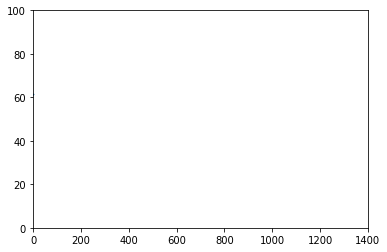

In [261]:
plt.plot(Intruder_angF_13[936:939])
plt.axis([0,1400,0,100])
#plt.scatter(Intruder_angF_13[pos[0:len(pos)]],'o')

In [270]:
start=[2,155,221,260,355,510,549,641,766,823,964,1145]
end=[83,214,249,314,480,530,611,700,800,926,1100,1340]

[0.9278471012006564, 1.5685540182573454, 1.9028253489444913, 1.0229041036666164, 1.295019319541289, 0.0685275879962526, 0.5615554658555706, 1.3828271196725488, 1.520342624250833, 0.847252481445075, 1.1466029275167677, 1.1373585323688469]
[0.4651545712962961, 0.4004737729982467, 0.4570609594964421, 0.4507556233657327, 0.4739085358771123, 0.3604762526315789, 0.4448285368789505, 0.47397857048509634, 0.4192894924369748, 0.46196455315643786, 0.4733250951696008, 0.4676394574940525]


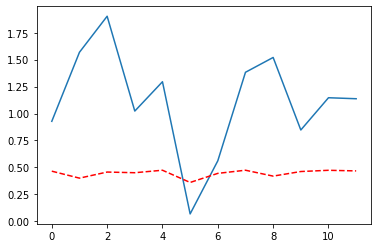

In [271]:
from scipy.stats import linregress
sl=[]
sl_in=[]
for i in range(0,len(start)):
    y=TP_0[start[i]:end[i]]
    x=range(start[i],end[i])
    y_1=(Intruder_angF_13[start[i]:end[i]])
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    slope_, intercept_, r_value_, p_value_, std_err_ = linregress(x, y_1)
    sl.append(abs(slope))
    sl_in.append(abs(slope_))
print(sl)
print(sl_in)
plt.plot(sl)
plt.plot(sl_in,'r--')

[0, 1400, 0, 100]

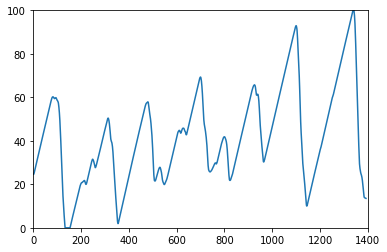

In [110]:
plt.plot(Intruder_angF_13)
plt.axis([0,1400,0,100])

In [59]:
## plot in subplots
"""
| 03 | 456 - 947 | 983 |
| 05 | 370 - 1200 | 1661 |
| 07 | 816 - 1400 | 1169 |
| 11 | 285 - 1022 | 1475 |
| 13 | 504 - 1200 | 1393 |
| 17 | 230 - 962 | 1465 |
| 19 | 417 - 933 | 1033 |
| 23 | 375 -915 | 1081 |
| 29 | 257 - 845 | 1177 |
| 31 | 368 - 831 | 927 |
"""
time=np.linspace( 456,947,983  )
#time2=np.linspace(1000,1200,4000)
fig = plt.figure(figsize=(10,10))    
ax1 = fig.add_subplot(5,1,1)
ax1.plot(time,TP_0,color='red',label='TP')
ax1.set_xlabel('time')
ax1.set_ylabel('TP', color='red')
#ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor='red')
ax2 = fig.add_subplot(5,1,2)
ax2.plot(time,Tp_above_,color='blue',label='TP_aboveavg')
ax2.set_xlabel('time')
ax2.set_ylabel('TP_ab_avgF', color='blue')
#ax2.set_xscale('log')
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='blue')
ax3 = fig.add_subplot(5,1,3)
ax3.plot(time,Tp_below_,color='green',label='TP_belowavg')
ax3.set_xlabel('time')
ax3.set_ylabel('TP_bel_avgF', color='green') # instantiate a second axes that shares the same x-axis
#ax3.set_xscale('log')
#ax3.set_yscale('log')
ax3.tick_params(axis='y', labelcolor='green')
ax4 = fig.add_subplot(5,1,4)
ax4.plot(time, abs(Intruder_Velocity_03),color='magenta', label='tot_force')
ax4.set_xlabel('time')
ax4.set_ylabel('velocity', color='magenta')  # we already handled the x-label with ax1
ax4.tick_params(axis='y', labelcolor='magenta') #ax4.tick_params(axis='y', labelcolor='magenta')
#ax4.set_yscale('log')  #ax5=ax4.twinx()
ax5 = fig.add_subplot(5,1,5)
ax5.plot(time,abs(Intruder_angF_03),color='black', label='black')
ax5.set_ylabel('ang_force')
#ax5.set_yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.title('Total Peristence_all vs total force')
#plt.legend(loc='\n'+'total force')
#plt.savefig('G:/PD_0/' + ('total persistence for PD_0_90'), dpi=800)
plt.savefig('../simulation_data/New_data/Results/'+'TP_above_below_03_peravg' )
plt.close()
plt.show()

In [82]:
gen=[]
gen_above=[]
gen_below=[]

aveg=[]
for idx in range(1,s[4]):
    file_name = ('../simulation_data/New_data/DATA/s13/' + 'force_contact_' + '%06d.dat' % idx)
    data=np.loadtxt(file_name)
    id1 = data[:,0]
    id2 = data[:,1]
    force = data[:,4]+data[:,5]
    #print(force)
    aveg.append(np.average(force))
average=np.array(aveg)
#print(average)
for i in range(1,s[4]):   
    file=open('../simulation_data/PD_files/s13/' + str(i)+'.txt','r')
    file2=file.read()
    file3=file2.replace('(0,','')
    file4=file3.replace('))','')
    file5=file4.replace(' (','')
    file6=file5.replace('[','')
    file7=file6.replace(']','')
    file8=file7.replace(' ','')
    file9=file8.replace('inf','0')
    data=file9.split(',')
    data1=np.asarray(data)
    #print(len(data1))
    count_above=0
    count_below=0
    #count=0
    gen.append(len(data1)//2)
    for j in range(0,len(data1)//2):
        if abs(float(data1[2*j]))>average and abs(float(data1[2*j+1]))>average:
            count_above=count_above+1
            #print(count)
    gen_above.append(count_above)
    #print(gen_above)
    for j in range(0,len(data1)//2):
        if abs(float(data1[2*j]))<average and abs(float(data1[2*j+1]))<average:
            count_below=count_below+1
            #print(count)
    gen_below.append(count_below)
generator_Above=np.array(gen_above)
generator_below=np.array(gen_below)
generator=np.array(gen)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
print(generator)

In [ ]:
## plot in subplots
"""
| 03 | 456 - 947 | 983 |
| 05 | 370 - 1200 | 1661 |
| 07 | 816 - 1400 | 1169 |
| 11 | 285 - 1022 | 1475 |
| 13 | 504 - 1200 | 1393 |
| 17 | 230 - 962 | 1465 |
| 19 | 417 - 933 | 1033 |
| 23 | 375 -915 | 1081 |
| 29 | 257 - 845 | 1177 |
| 31 | 368 - 831 | 927 |
"""
time=np.linspace(504, 1200,1393)
#time2=np.linspace(1000,1200,4000)
fig = plt.figure(figsize=(10,10))
ax3 = fig.add_subplot(5,1,1)
ax3.plot(time,generator,color='red',label='Generators')
ax3.set_xlabel('time')
ax3.set_ylabel('geenrators', color='red') # instantiate a second axes that shares the same x-axis
#ax3.set_xscale('log')
#ax3.set_yscale('log')
ax3.tick_params(axis='y', labelcolor='red')
ax1 = fig.add_subplot(5,1,2)
ax1.plot(time,generator_Above,color='blue',label='TP')
ax1.set_xlabel('time')
ax1.set_ylabel('gen_Above_avg', color='blue')
#ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = fig.add_subplot(5,1,3)
ax2.plot(time,generator_below,color='green',label='gen_aboveavg')
ax2.set_xlabel('time')
ax2.set_ylabel('gen_below_Avg', color='green')
#ax2.set_xscale('log')
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='green')
ax4 = fig.add_subplot(5,1,4)
ax4.plot(time, abs(Intruder_Velocity_13),color='magenta', label='tot_force')
ax4.set_xlabel('time')
ax4.set_ylabel('velocity', color='magenta')  # we already handled the x-label with ax1
ax4.tick_params(axis='y', labelcolor='magenta') #ax4.tick_params(axis='y', labelcolor='magenta')
#ax4.set_yscale('log')  #ax5=ax4.twinx()
ax5 = fig.add_subplot(5,1,5)
ax5.plot(time,abs(Intruder_angF_13),color='black', label='black')
ax5.set_ylabel('ang_force')
#ax5.set_yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.title('Total Peristence_all vs total force')
#plt.legend(loc='\n'+'total force')
#plt.savefig('G:/PD_0/' + ('total persistence for PD_0_90'), dpi=800)
plt.savefig('../simulation_data/New_data/Results/'+'Generator_above_below_13' )
plt.close()
plt.show()

In [69]:
b0=[]
b0_above=[]
b0_below=[]

aveg=[]
for idx in range(1,s[4]):
    file_name = ('../simulation_data/New_data/DATA/s13/' + 'force_contact_' + '%06d.dat' % idx)
    data=np.loadtxt(file_name)
    id1 = data[:,0]
    id2 = data[:,1]
    force = data[:,4]+data[:,5]
    #print(force)
    aveg.append(np.average(force))
average=np.average(aveg)
#print(average)
for i in range(1,s[4]):   
    file=open('../simulation_data/PD_files/s13/' + str(i)+'.txt','r')
    file2=file.read()
    file3=file2.replace('(0,','')
    file4=file3.replace('))','')
    file5=file4.replace(' (','')
    file6=file5.replace('[','')
    file7=file6.replace(']','')
    file8=file7.replace(' ','')
    file9=file8.replace('inf','0')
    data=file9.split(',')
    data1=np.asarray(data)
    #print(len(data1))
    count=0
    #count_below=0
    for i in range(0,len(data1)//2):
        if abs(float(data1[2*i]))>average and abs(float(data1[2*i+1]))<average:
            count=count+1
            #print(count)
    b0.append(count)
B0=np.array(b0) 

In [70]:
print(B0)

[4 5 1 ... 2 1 2]


<Figure size 720x720 with 0 Axes>

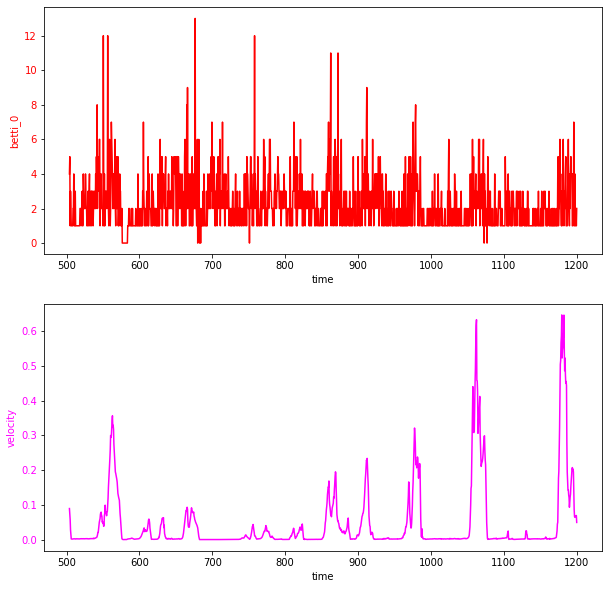

In [152]:
fig = plt.figure(figsize=(10,10))
time=np.linspace(504, 1200,1393)
#time2=np.linspace(1000,1200,4000)
fig = plt.figure(figsize=(10,10))
ax3 = fig.add_subplot(2,1,1)
ax3.plot(time,B0,color='red',label='Generators')
ax3.set_xlabel('time')
ax3.set_ylabel('betti_0', color='red') # instantiate a second axes that shares the same x-axis
#ax3.set_xscale('log')
#ax3.set_yscale('log')
ax3.tick_params(axis='y', labelcolor='red')
#plt.plot(np.linspace(504,1200,1393),B0)
ax4 = fig.add_subplot(2,1,2)
ax4.plot(time, abs(Intruder_Velocity_13),color='magenta', label='tot_force')
ax4.set_xlabel('time')
ax4.set_ylabel('velocity', color='magenta')  # we already handled the x-label with ax1
ax4.tick_params(axis='y', labelcolor='magenta') #ax4.tick_params(axis='y', labelcolor='magenta')
#ax4.set_yscale('log')  #ax5=ax4.twinx()
plt.savefig('../simulation_data/New_data/Results/'+'betti_0_13' )